# Обучение без учителя (unsupervised learning)

Основные типы задач:

1. Кластеризация. Clustering
1. Data Scaling
1. Метод главных компонент. Principal Component Analysis (PCA)
1. Детекция аномалий.Anomalies Detection

## Кластеризация (Clustering)









### Подготовка датасета

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# загрузка данных и структура данных
dataset=pd.read_csv('/content/drive/MyDrive/20.11.24/Spotifyy2.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset = dataset.sample(frac=1)
dataset.head()

,artists,acousticness,valence,mmpopularity,track_genre
1235,351,0.303,0.522,0.24,1
4191,1174,0.988,0.240,0.58,4
2376,802,0.374,0.351,0.69,2
8213,2387,0.335,0.188,0.54,8
2779,938,0.352,0.657,0.45,2


# Предобработка (не помогло)

In [ ]:
# len(dataset)

In [ ]:
# def plt_boxplot(y, t):
#   colors = ["#0101DF", "#DF0101"]
#   f, axes = plt.subplots(ncols=4, figsize=(20,4))
#   s = "негативная корреляция" if t == 1 else "Положительная корреляция"
#   #
#   sns.boxplot(x="track_genre",y = y[0],data = dataset,ax=axes[0], palette = colors)
#   axes[0].set_title("Признак " + y[0] + " vs Class " + '\n'+ s)
#   #
#   sns.boxplot(x="track_genre",y = y[1],data = dataset,ax=axes[1], palette = colors)
#   axes[1].set_title("Признак " + y[1] + " vs Class " + '\n'+ s)
#   #
#   sns.boxplot(x="track_genre",y = y[2],data = dataset,ax=axes[2], palette = colors)
#   axes[2].set_title("Признак " + y[2] + " vs Class " + '\n'+ s)
#   #
#   sns.boxplot(x="track_genre",y = y[3],data = dataset,ax=axes[3], palette = colors)
#   axes[3].set_title("Признак " + y[3] + " vs Class " + '\n'+ s)
#   plt.show()

In [ ]:
# # признаки
# neg = ["artists", "acousticness", "valence", "mmpopularity"]

Построим теперь Boxplot.

In [ ]:
# plt_boxplot(neg,1)
# #  корреляции



In [ ]:
# #функция, в качастве параметра которой будут вытупать выбросы других признаков
# def del_fraud_column(column,new_df):
#   # Удаление выбросов из признака V
#   v_fraud = new_df[column].loc[new_df['track_genre'] == 3].values
#   q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
#   print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
#   v_iqr = q75 - q25
#   print('iqr: {}'.format(v_iqr))

#   v_cut_off = v_iqr * 1.5
#   v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
#   print('Порог: {}'.format(v_cut_off))
#   print(column, ' нижняя граница: {}'.format(v_lower))
#   print(column, ' верхняя граница: {}'.format(v_upper))

#   outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
#   print('Количество выбросов: {}'.format(len(outliers)))

#   new_df_without_outliers  = new_df[(new_df[column] > v_upper) | (new_df[column] < v_lower)].index.to_numpy()
#   print('----' * 44)
#   return new_df_without_outliers

In [ ]:
# del_rows=np.array([])
# for f in dataset.columns:
#   if f != 'track_genre':
#     del_rows = np.union1d(del_rows,del_fraud_column(f,dataset))
# new_df_without_outliers = dataset.drop(del_rows)


In [ ]:
# len(new_df_without_outliers)

In [ ]:
# print(new_df_without_outliers.track_genre.unique())

In [ ]:
# new_df_without_outliers["track_genre"].value_counts()

In [ ]:
# new_df_without_outliers.loc[new_df_without_outliers['track_genre'] == 4, 'track_genre'] = 5
# new_df_without_outliers.loc[new_df_without_outliers['track_genre'] == 8, 'track_genre'] = 5
# new_df_without_outliers.loc[new_df_without_outliers['track_genre'] == 0, 'track_genre'] = 5
# new_df_without_outliers.loc[new_df_without_outliers['track_genre'] == 6, 'track_genre'] = 5

In [ ]:
# new_df_without_outliers["track_genre"].value_counts()

In [ ]:
# dataset = new_df_without_outliers

In [ ]:
# plt_boxplot(neg,1)
# #  корреляции



# лаба

In [ ]:
dataset.track_genre.value_counts()

,count
track_genre,
7,989
1,985
0,985
2,982
3,980
6,978
5,960
4,905
8,757


In [ ]:
dataset = dataset[dataset.track_genre != 8]
print(dataset.track_genre.unique())

[1 4 2 0 7 3 5 6]


In [ ]:
vals = dataset["track_genre"].unique()
vals.sort()
vals

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
# в моем случае все столбцы числовые
df= dataset.drop(['track_genre'], axis=1) # делаем копию, чтобы не было сюрпризов с исходным набором данных


In [ ]:
df.head()

,artists,acousticness,valence,mmpopularity
1235,351,0.3030,0.522,0.24
4191,1174,0.9880,0.240,0.58
2376,802,0.3740,0.351,0.69
2779,938,0.3520,0.657,0.45
255,89,0.0591,0.468,0.47


In [ ]:
X = df
yvals = dataset["track_genre"]

In [ ]:
y = dataset["track_genre"]

In [ ]:
y

,track_genre
1235,1
4191,4
2376,2
2779,2
255,0
...,...
6352,6
4020,4
4406,4
1176,1


### Распространенные алгоритмы кластеризации



#### K-Means
K-Means на сегодняшний день является самым популярным алгоритмом кластеризации, учитывая, что его очень легко понять и применить к широкому спектру задач науки о данных и машинного обучения.

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

[0 1 2 3 4 5 6 7]


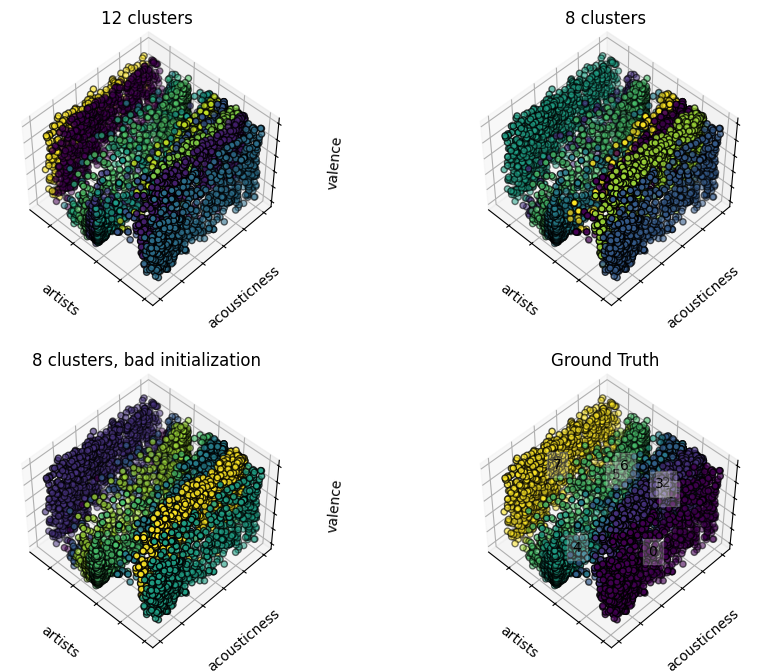

In [ ]:
estimators = [
    ("k_means_spotify_12", KMeans(n_clusters=12)),
    ("k_means_spotify_8", KMeans(n_clusters=8)),
    ("k_means_spotify_bad_init", KMeans(n_clusters=8, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["12 clusters", "8 clusters", "8 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["artists"], X["acousticness"], X["valence"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("artists")
    ax.set_ylabel("acousticness")
    ax.set_zlabel("valence")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

print(vals)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2),(vals[3], 3),(vals[4], 4),(vals[5], 5), (vals[6], 6), (vals[7], 7)]:
    ds = dataset[dataset["track_genre"]==name]
    ax.text3D(
        ds["artists"].mean(),
        ds["acousticness"].mean(),
        ds["valence"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["artists"], X["acousticness"], X["valence"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("artists")
ax.set_ylabel("acousticness")
ax.set_zlabel("valence")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.45, hspace=0.25)
plt.show()

#### Метрики

**Оценка силуэта (Silhouette Score):**


**Скорректированный индекс Рэнда (Adjusted Rand Index, ARI):**


In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [ ]:
best_metric

[13,
 0.6084724932638994,
 0.5434150453143047,
 array([[7.13360190e+02, 1.22500109e-01, 5.17161517e-01, 3.02398104e-01],
        [1.82522440e+03, 3.87674022e-02, 2.12206444e-01, 2.38285386e-01],
        [1.79211111e+02, 5.31493216e-01, 4.56206667e-01, 3.83944444e-01],
        [1.07587482e+03, 3.73916748e-01, 3.73854196e-01, 3.39061166e-01],
        [2.05330535e+03, 4.26500829e-01, 5.36104988e-01, 2.55766423e-01],
        [1.47125333e+03, 3.40357231e-01, 3.63119600e-01, 4.85653333e-01],
        [5.17022222e+02, 2.33750239e-01, 7.40606349e-01, 2.18888889e-01],
        [4.42777778e+01, 5.80938984e-01, 3.97199462e-01, 4.58405018e-01],
        [1.22571238e+03, 7.90032070e-01, 1.74160952e-01, 4.28590476e-01],
        [2.18908833e+03, 6.39231924e-01, 6.75316088e-01, 2.31482650e-01],
        [8.58258126e+02, 1.32778402e-01, 5.44266157e-01, 3.00248566e-01],
        [3.57682021e+02, 3.26912145e-01, 6.57129123e-01, 2.71812779e-01],
        [1.62852721e+03, 2.34790359e-01, 4.95478231e-01, 4.505782

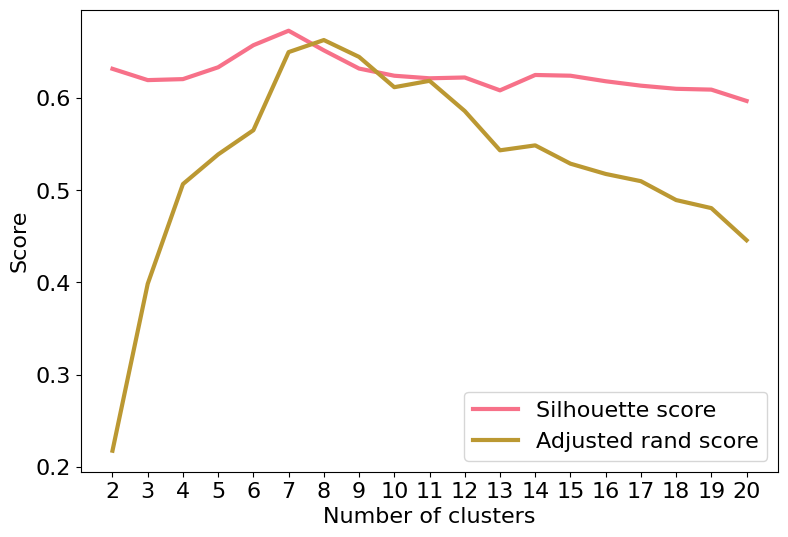

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

#### Иерархическая кластеризация


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df.values

array([[3.510e+02, 3.030e-01, 5.220e-01, 2.400e-01],
       [1.174e+03, 9.880e-01, 2.400e-01, 5.800e-01],
       [8.020e+02, 3.740e-01, 3.510e-01, 6.900e-01],
       ...,
       [1.328e+03, 8.690e-01, 1.080e-01, 4.800e-01],
       [3.450e+02, 3.320e-01, 6.840e-01, 2.900e-01],
       [1.838e+03, 2.300e-05, 1.170e-01, 1.700e-01]])

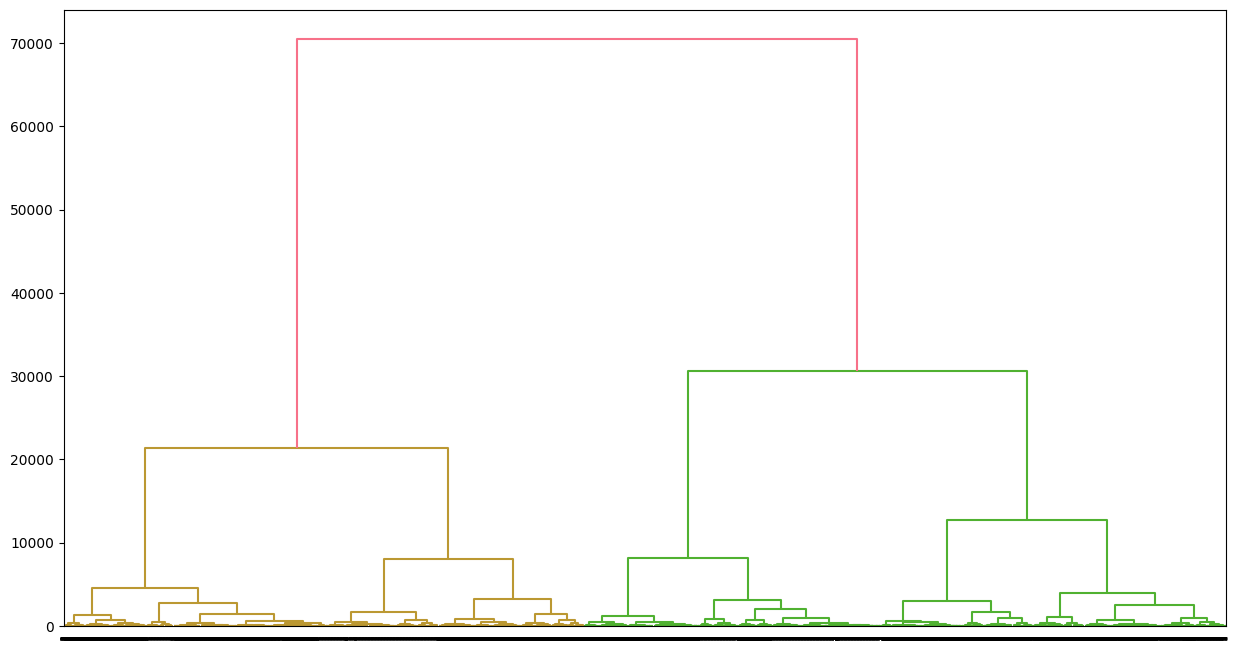

In [ ]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [ ]:
mergings

array([[2.00000000e+00, 3.18500000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.00000000e+00, 3.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.80000000e+01, 2.90300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.55200000e+04, 1.55210000e+04, 2.13264950e+04, 3.47800000e+03],
       [1.55220000e+04, 1.55230000e+04, 3.06320965e+04, 4.28600000e+03],
       [1.55240000e+04, 1.55250000e+04, 7.04829462e+04, 7.76400000e+03]])

In [ ]:
len(samples)

7764

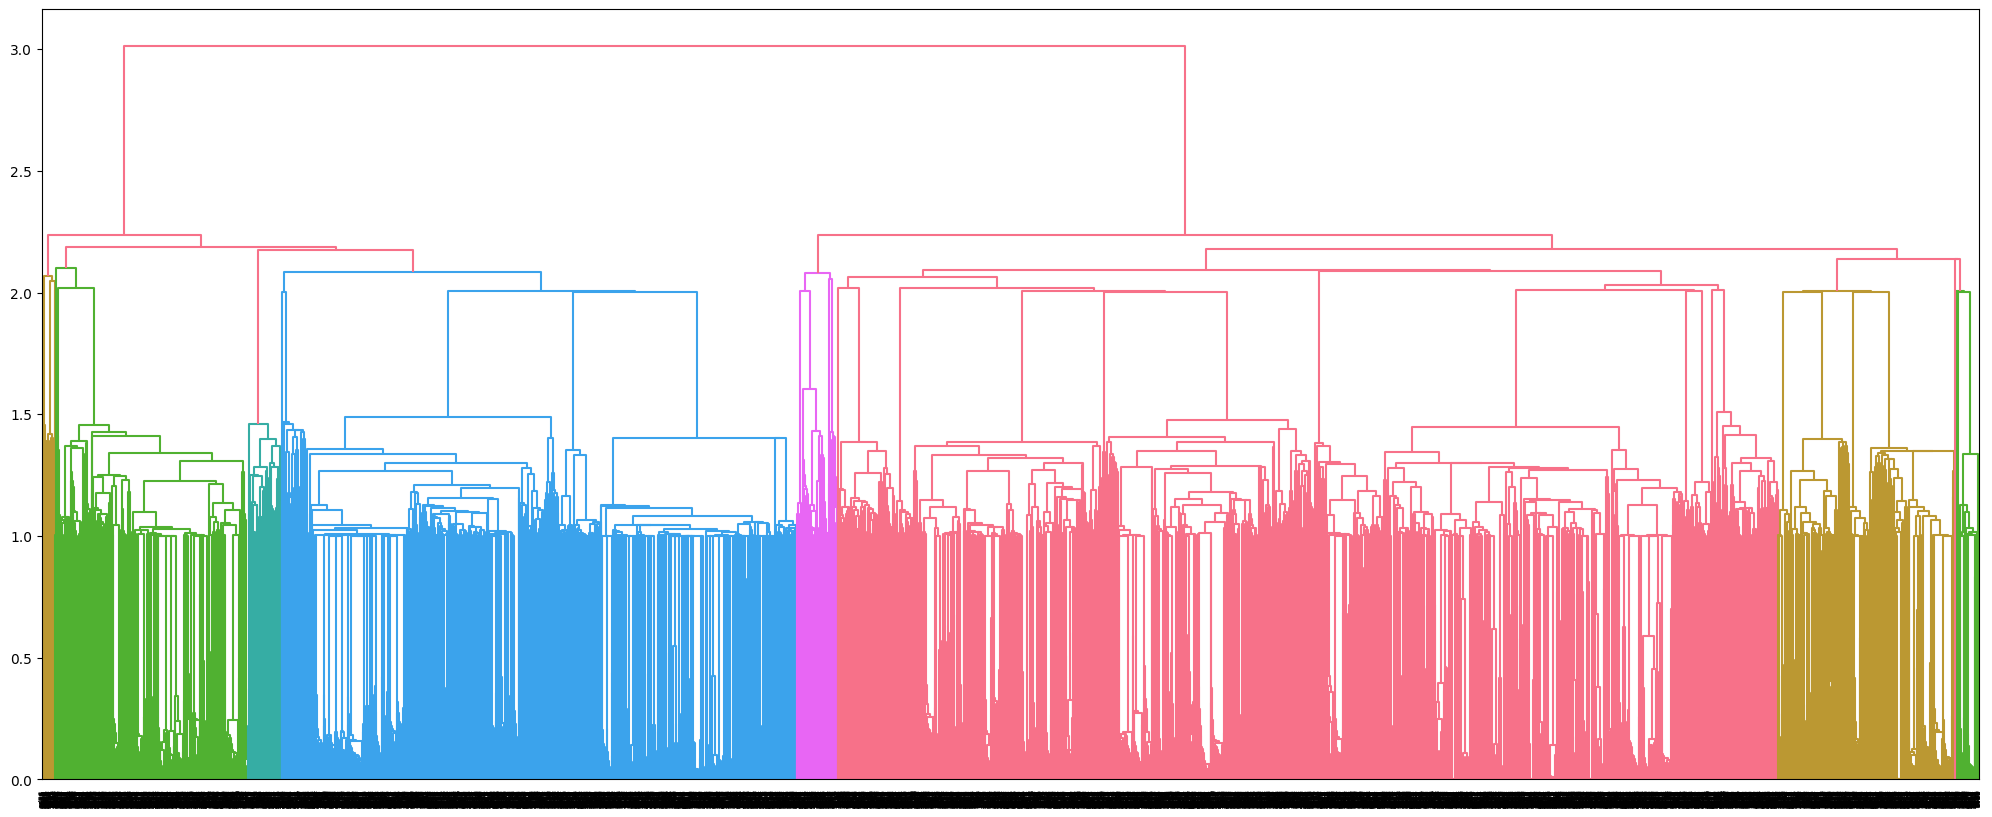

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Z = linkage(samples, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [ ]:
Z

array([[3.07000000e+02, 9.45000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.42600000e+03, 7.76400000e+03, 0.00000000e+00, 3.00000000e+00],
       [4.78400000e+03, 7.76500000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.55130000e+04, 1.55230000e+04, 2.23699080e+00, 3.02500000e+03],
       [1.55140000e+04, 1.55220000e+04, 2.23855318e+00, 4.73900000e+03],
       [1.55240000e+04, 1.55250000e+04, 3.01349515e+00, 7.76400000e+03]])

#### DBSCAN
***Пространственная кластеризация приложений с шумом на основе плотности***



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

In [ ]:
mins

4

In [ ]:
# N различных цветов
def spec(N):
    t = np.linspace(-510, 510, N)
    return np.round(np.clip(np.stack([-t, 510-np.abs(t), t], axis=1), 0, 255)).astype(np.uint8)

In [ ]:
def rgb_to_hex(N):
  return ['#%02x%02x%02x' % (x[0], x[1], x[2]) for x in spec(N)]


In [ ]:
rgb_to_hex(9)

['#ff0000',
 '#ff8000',
 '#ffff00',
 '#80ff00',
 '#00ff00',
 '#00ff80',
 '#00ffff',
 '#0080ff',
 '#0000ff']

['#ff0000', '#ff0400', '#ff0900', '#ff0d00', '#ff1200', '#ff1600', '#ff1a00', '#ff1f00', '#ff2300', '#ff2800', '#ff2c00', '#ff3100', '#ff3500', '#ff3900', '#ff3e00', '#ff4200', '#ff4700', '#ff4b00', '#ff4f00', '#ff5400', '#ff5800', '#ff5d00', '#ff6100', '#ff6600', '#ff6a00', '#ff6e00', '#ff7300', '#ff7700', '#ff7c00', '#ff8000', '#ff8400', '#ff8900', '#ff8d00', '#ff9200', '#ff9600', '#ff9b00', '#ff9f00', '#ffa300', '#ffa800', '#ffac00', '#ffb100', '#ffb500', '#ffb900', '#ffbe00', '#ffc200', '#ffc700', '#ffcb00', '#ffd000', '#ffd400', '#ffd800', '#ffdd00', '#ffe100', '#ffe600', '#ffea00', '#ffee00', '#fff300', '#fff700', '#fffc00', '#feff00', '#f9ff00', '#f5ff00', '#f1ff00', '#ecff00', '#e8ff00', '#e3ff00', '#dfff00', '#dbff00', '#d6ff00', '#d2ff00', '#cdff00', '#c9ff00', '#c4ff00', '#c0ff00', '#bcff00', '#b7ff00', '#b3ff00', '#aeff00', '#aaff00', '#a6ff00', '#a1ff00', '#9dff00', '#98ff00', '#94ff00', '#90ff00', '#8bff00', '#87ff00', '#82ff00', '#7eff00', '#79ff00', '#75ff00', '#71ff00'

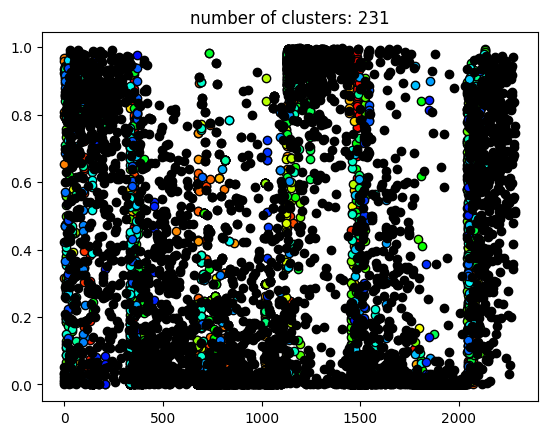

1


In [ ]:
db = DBSCAN(eps=0.9, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)

# colors = ['y', 'b', 'g', 'r','c','m','k','w']
colors = rgb_to_hex(len(unique_labels))
print(colors)
print(len(colors), len(unique_labels))
count = 0
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'
		count += 1

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["artists"], xy["acousticness"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["artists"], xy["acousticness"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()
print(count)

Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

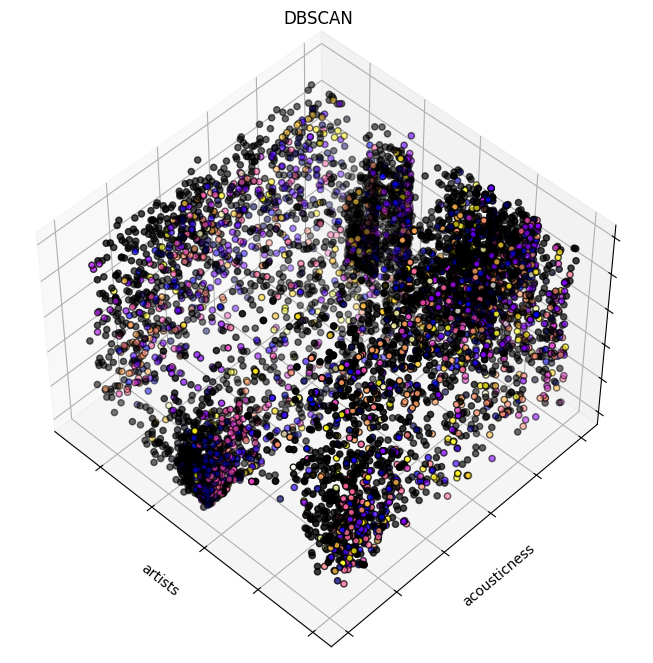

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["artists"], X["acousticness"], X["valence"], c=labels.astype(float),cmap = "gnuplot2" , edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("artists")
ax.set_ylabel("acousticness")
ax.set_zlabel("valence")
ax.set_title("DBSCAN")

plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.13
Adjusted Rand Index: 0.01


По полученным показателям, можно сказать, что eps для DBSCAN был подобран неправильно